In [9]:
import torchvision
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(3),
    transforms.ToTensor(),
])

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=mnist_transform)
mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=mnist_transform)

svhn_transform = transforms.Compose([transforms.ToTensor(), ])
svhn_trainset = torchvision.datasets.SVHN(root='./data', split='train', download=True, transform=svhn_transform)
svhn_testset = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=svhn_transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4307719.26it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3610709.52it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2901517.36it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4517554.84it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Using downloaded and verified file: ./data\train_32x32.mat
Using downloaded and verified file: ./data\test_32x32.mat


In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision

class PairedMNISTSVHN(Dataset):
    def __init__(self, mnist_dataset, svhn_dataset):
        self.mnist_dataset = mnist_dataset
        self.svhn_dataset = svhn_dataset

        # Create a mapping from digit labels to indices for SVHN
        self.svhn_label_to_indices = {i: [] for i in range(10)}
        for idx, label in enumerate(self.svhn_dataset.labels):
            self.svhn_label_to_indices[label].append(idx)

    def __len__(self):
        # Return the size of the MNIST dataset
        return len(self.mnist_dataset)

    def __getitem__(self, idx):
        # Get an MNIST sample
        mnist_img, mnist_label = self.mnist_dataset[idx]
        
        # Get a random SVHN sample with the same label
        svhn_idx = torch.randint(0, len(self.svhn_label_to_indices[mnist_label]), (1,)).item()
        svhn_img = self.svhn_dataset[self.svhn_label_to_indices[mnist_label][svhn_idx]][0]

        return mnist_img, svhn_img, mnist_label


In [ ]:
# Paired Dataset
paired_trainset = PairedMNISTSVHN(mnist_trainset, svhn_trainset)
paired_trainloader = DataLoader(paired_trainset, batch_size=32, shuffle=True)

# Paired Dataset
paired_testset = PairedMNISTSVHN(mnist_testset, svhn_testset)
paired_testloader = DataLoader(paired_testset, batch_size=32, shuffle=False)

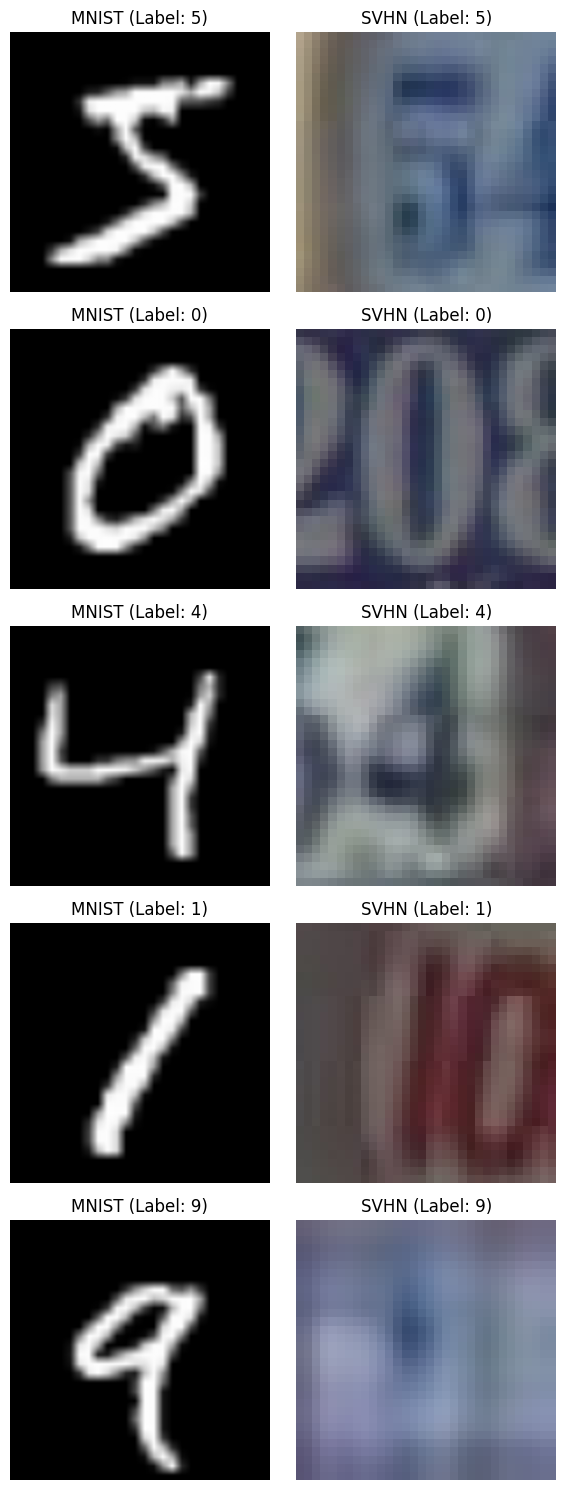

In [ ]:
import matplotlib.pyplot as plt

def visualize_paired_samples(dataset, num_samples=5):
    """
    Visualizes a few paired samples from the dataset.
    
    Args:
        dataset (Dataset): The paired dataset (e.g., PairedMNISTSVHN).
        num_samples (int): Number of samples to visualize.
    """
    fig, axes = plt.subplots(num_samples, 2, figsize=(6, num_samples * 3))
    for i in range(num_samples):
        # Get a random sample from the dataset
        mnist_img, svhn_img, label = dataset[i]
        
        # Convert tensors to numpy arrays for visualization
        mnist_img_np = mnist_img.permute(1, 2, 0).numpy()  # CHW to HWC
        svhn_img_np = svhn_img.permute(1, 2, 0).numpy()    # CHW to HWC

        # Plot MNIST image
        axes[i, 0].imshow(mnist_img_np.squeeze(), cmap='gray')
        axes[i, 0].set_title(f"MNIST (Label: {label})")
        axes[i, 0].axis('off')

        # Plot SVHN image
        axes[i, 1].imshow(svhn_img_np)
        axes[i, 1].set_title(f"SVHN (Label: {label})")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize paired samples
visualize_paired_samples(paired_trainset, num_samples=5)


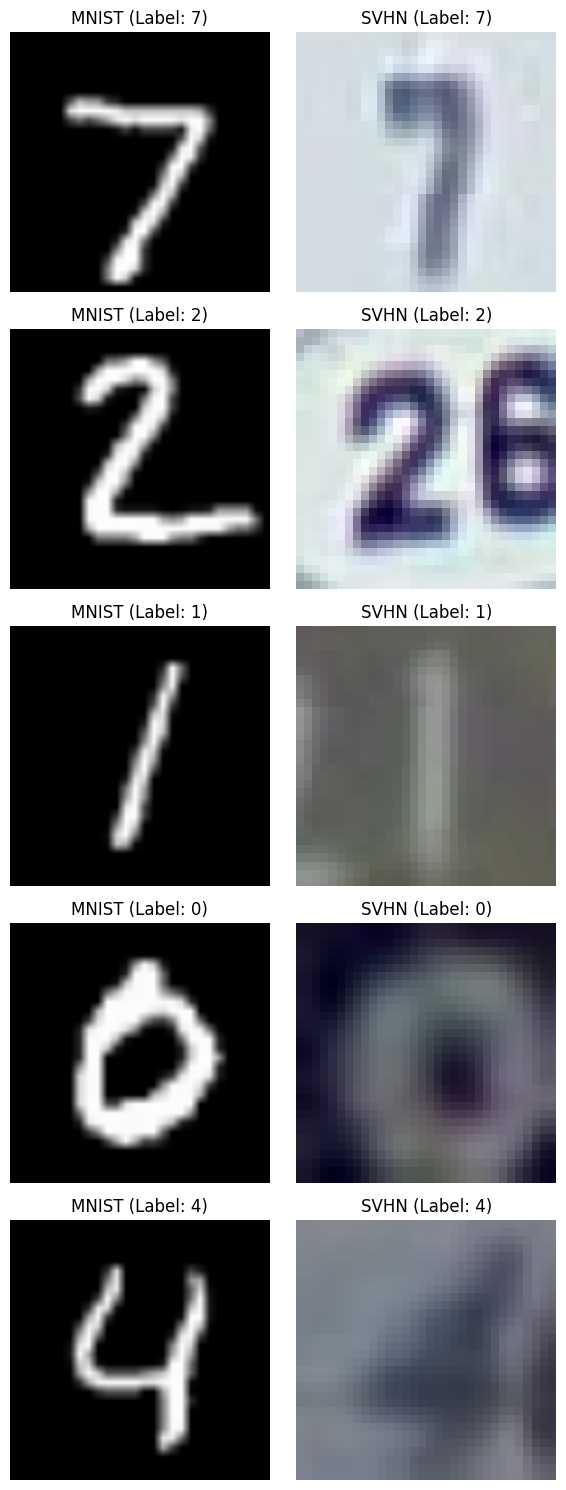

In [15]:

# Visualize paired samples
visualize_paired_samples(paired_testset, num_samples=5)


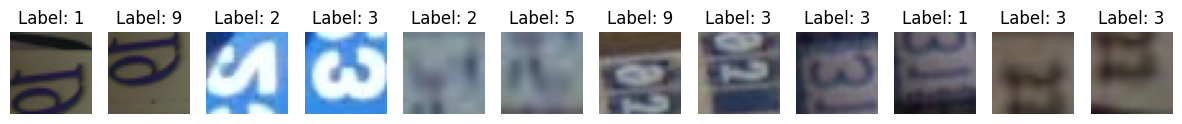

In [8]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the MATLAB file (replace with your actual file paths)
train_data = scipy.io.loadmat('./data/train_32x32.mat')
test_data = scipy.io.loadmat('./data/test_32x32.mat')

# Extract images and labels from the dataset
train_images = train_data['X']  # Images are stored in a 4D array (32x32x3xN)
train_labels = train_data['y']  # Labels are stored in a 2D array

# Visualize a few images
def show_images(images, labels, count=12):
    plt.figure(figsize=(15, 2))
    for i in range(count):
        # Images in SVHN are stored as (32, 32, 3, N), so we need to transpose them
        img = np.transpose(images[:,:,:,i], (1, 0, 2))
        label = labels[i][0]
        
        plt.subplot(1, count, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

# Display 5 sample images from the training set
show_images(train_images, train_labels)